In [1]:
import time
import random
import datetime
import pandas as pd
import matplotlib.pyplot as plt
import statistics
import numpy as np
from scipy import stats
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import RANSACRegressor, LinearRegression, TheilSenRegressor
%matplotlib inline

In [2]:
from sklearn.metrics import explained_variance_score, mean_absolute_error, mean_squared_error, median_absolute_error, r2_score
from sklearn.svm import SVR
from sklearn.linear_model import Ridge,Lasso,ElasticNet,BayesianRidge
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import cross_val_score
import seaborn
from IPython.display import Image

In [3]:
data=pd.read_csv("Concrete_Data.csv")

In [4]:
print(len(data))
data.head()

1030


,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [5]:
data.columns=['cement_component','furnance_slag','flay_ash','water_component','superplasticizer','coarse_aggregate','fine_aggregate','age','concrete_strength']

In [6]:
data.head()

,cement_component,furnance_slag,flay_ash,water_component,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


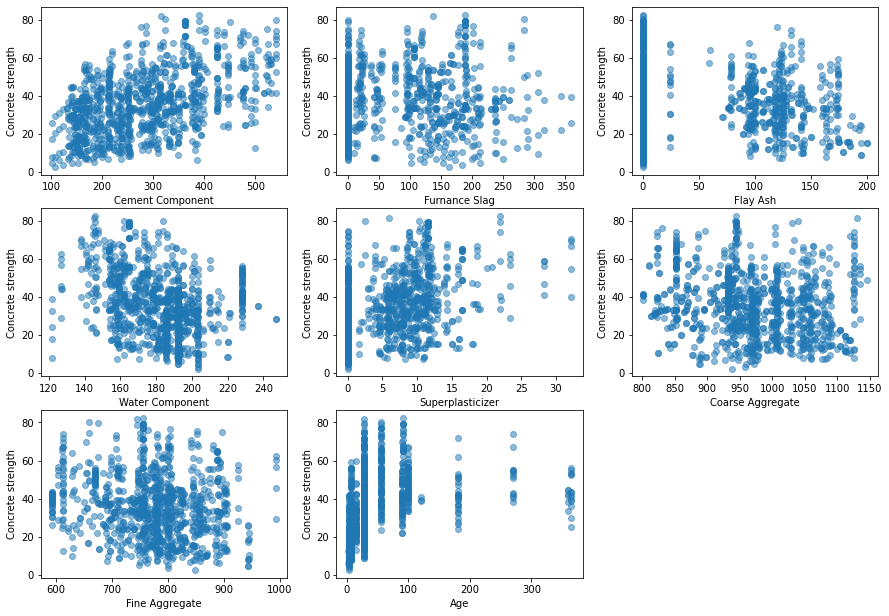

In [7]:
plt.figure(figsize=(15,10.5))
plot_count = 1
for feature in list(data.columns)[:-1]:
 plt.subplot(3,3,plot_count)
 plt.scatter(data[feature], data['concrete_strength'],alpha=0.5)
 plt.xlabel(feature.replace('_',' ').title())
 plt.ylabel('Concrete strength')
 plot_count+=1

In [8]:
 # Calculating pearwise calculations:-
 pd.set_option('display.width',100)
pd.set_option('precision',3)
 correlations=data.corr(method='pearson') 
correlations

,cement_component,furnance_slag,flay_ash,water_component,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_strength
cement_component,1.000,-0.275,-0.397,-0.082,0.092,-0.109,-0.223,0.082,0.498
furnance_slag,-0.275,1.000,-0.324,0.107,0.043,-0.284,-0.282,-0.044,0.135
flay_ash,-0.397,-0.324,1.000,-0.257,0.378,-0.010,0.079,-0.154,-0.106
water_component,-0.082,0.107,-0.257,1.000,-0.658,-0.182,-0.451,0.278,-0.290
superplasticizer,0.092,0.043,0.378,-0.658,1.000,-0.266,0.223,-0.193,0.366
coarse_aggregate,-0.109,-0.284,-0.010,-0.182,-0.266,1.000,-0.178,-0.003,-0.165
fine_aggregate,-0.223,-0.282,0.079,-0.451,0.223,-0.178,1.000,-0.156,-0.167
age,0.082,-0.044,-0.154,0.278,-0.193,-0.003,-0.156,1.000,0.329
concrete_strength,0.498,0.135,-0.106,-0.290,0.366,-0.165,-0.167,0.329,1.000


KeyboardInterrupt: 

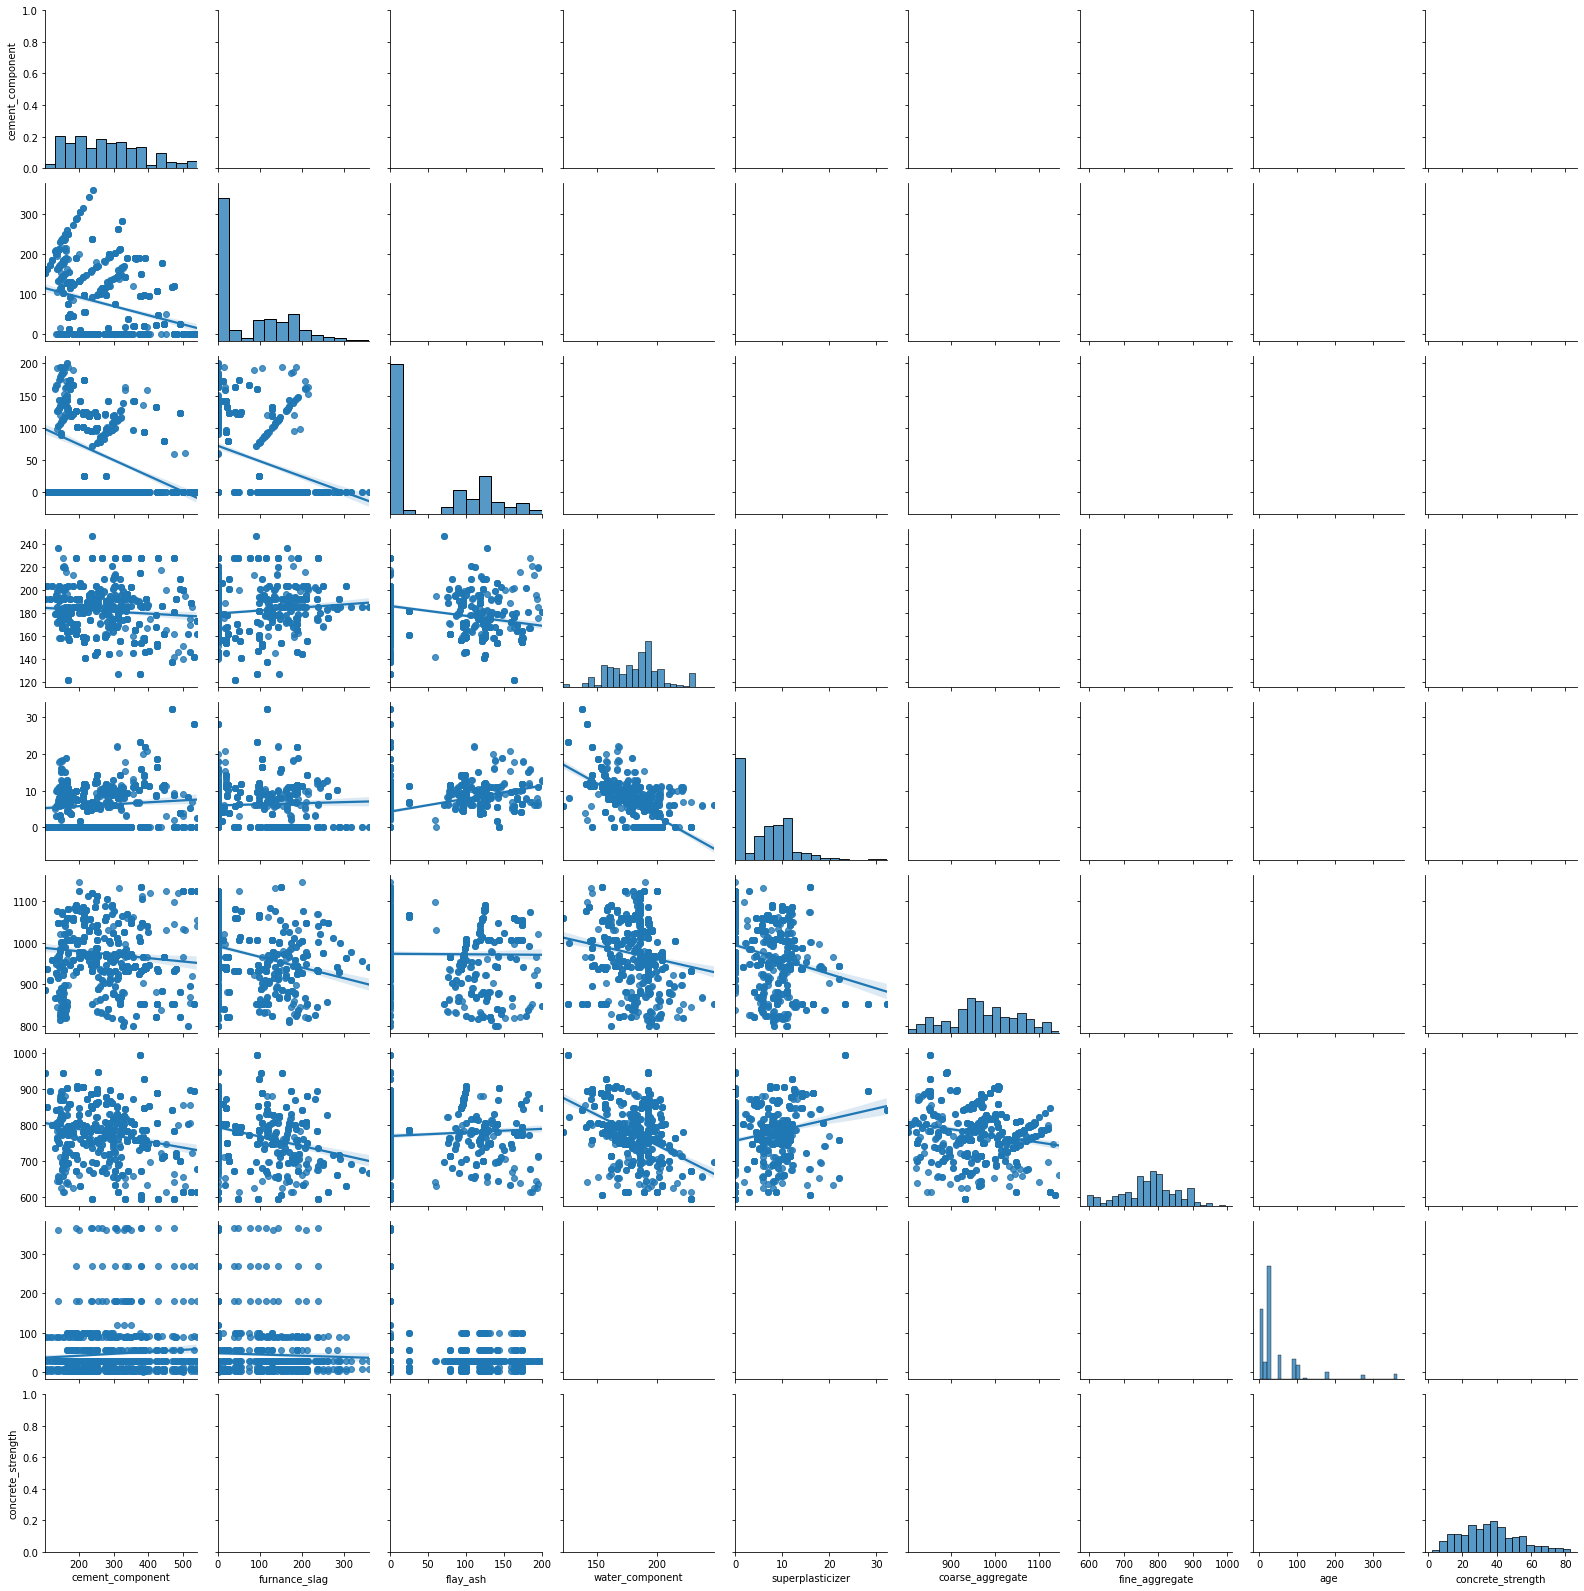

In [10]:
import seaborn as sns 
data_=data[(data.T !=0).any()]
sns.pairplot(data_,vars=data.columns,kind='reg')

In [12]:
def split_train_test(data,feature,train_index=0.7):
    train,test=train_test_split(data,test_size=1-train_index)
    if type(feature) == list:
        x_train = train[feature].as_matrix()
        y_train = train["concrete_strength"].as_matrix()
        
        x_test = test[feature].as_matrix()
        y_test = test['concrete_strength'].as_matrix()
        
  
    else:
         x_train = [[x] for x in list(train[feature])]
         y_train = [[x] for x in list(train['concrete_strength'])]
         x_test = [[x] for x in list(test[feature])]
         y_test = [[x] for x in list(test['concrete_strength'])]
    return x_train, y_train, x_test, y_test
    
    
    
    
    
    

cement_component 0.28260381961194725
flay_ash 0.031042226822157293
water_component 0.07342333643132026
superplasticizer 0.07374754461144806
coarse_aggregate 0.0051251281566169204


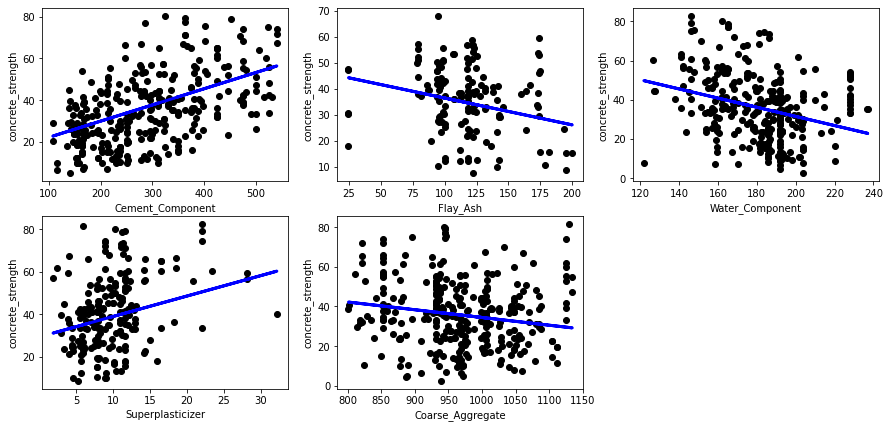

In [13]:
plt.figure(figsize=(15,7))
plot_count=1
for feature in ['cement_component','flay_ash','water_component','superplasticizer','coarse_aggregate']:
    data_tr=data[['concrete_strength',feature]]
    data_tr=data_tr[(data_tr.T !=0).all()]
    x_train,y_train,x_test,y_test=split_train_test(data_tr,feature)
    regr=LinearRegression()
    regr.fit(x_train,y_train)
    y_pred=regr.predict(x_test)
    plt.subplot(2,3,plot_count)
    plt.scatter(x_test,y_test,color='black')
    plt.plot(x_test,y_pred,color='blue',linewidth=3)
    plt.xlabel(feature.replace('-',' ').title())
    plt.ylabel('concrete_strength')
    print (feature, r2_score(y_test,y_pred))
    plot_count+=1

D:\user\anacinda\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Features: coarse_aggregate
R2 score: 0.260128
Intercept: 73.472937
Coefficients: [[-0.03904284]]


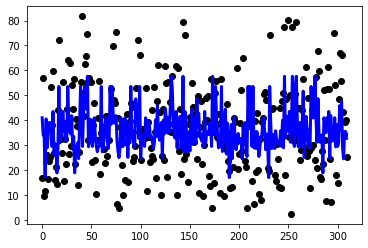

In [17]:
#multiplr gradient booster Regressor
model = GradientBoostingRegressor()
y_pred = model.fit(x_train, y_train).predict(x_test)
plt.scatter(range(len(y_test)), y_test, color='black')
plt.plot(y_pred, color='blue',linewidth=3)
print ('Features: %s'%str(feature))
print ('R2 score: %f'%r2_score(y_test, y_pred))
print ('Intercept: %f'%regr.intercept_)
print ('Coefficients: %s'%str(regr.coef_))

D:\user\anacinda\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


cement_component 0.21582843433490606


D:\user\anacinda\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


flay_ash 0.06183226893025451


D:\user\anacinda\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


water_component 0.08111100406098959
superplasticizer -0.031238080161408055


D:\user\anacinda\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
D:\user\anacinda\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


coarse_aggregate -0.000996822817019627


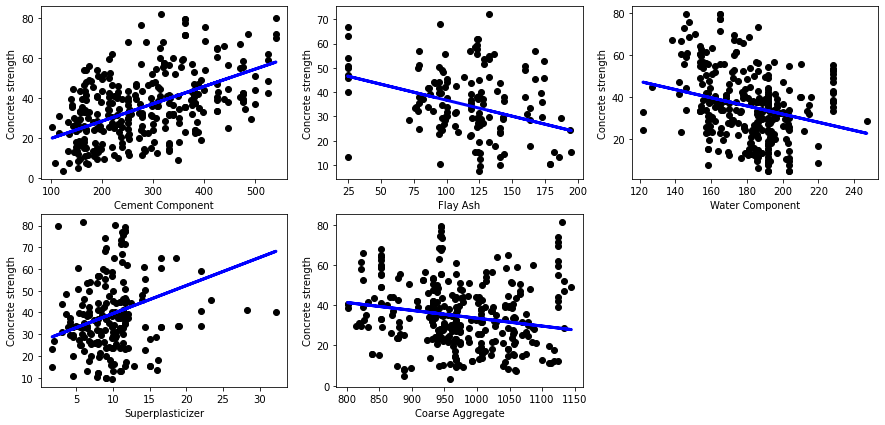

In [23]:
plt.figure(figsize=(15,7))
plot_count = 1
for feature in ['cement_component', 'flay_ash', 'water_component', 
'superplasticizer', 'coarse_aggregate']:
    data_tr = data[['concrete_strength', feature]]
    data_tr=data_tr[(data_tr.T != 0).all()]
    x_train, y_train, x_test, y_test = split_train_test(data_tr, feature)
    # Create linear regression object
    regr = SVR(kernel='linear')
     # Train the model using the training sets
    regr.fit(x_train, y_train)
    y_pred = regr.predict(x_test)
 # Plot outputs
    plt.subplot(2,3,plot_count)
    plt.scatter(x_test, y_test, color='black')
    plt.plot(x_test, y_pred, color='blue', linewidth=3)
    plt.xlabel(feature.replace('_',' ').title())
    plt.ylabel('Concrete strength')
    print (feature ,r2_score(y_test, y_pred))
    plot_count+=1


D:\user\anacinda\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Features: coarse_aggregate
R2 score: -0.000997


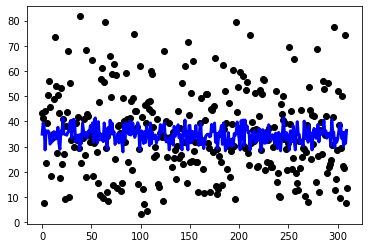

In [25]:
model = SVR(kernel='linear')
y_pred = model.fit(x_train, y_train).predict(x_test)
plt.scatter(range(len(y_test)), y_test, color='black')
plt.plot(y_pred, color='blue', linewidth=3)
print ('Features: %s'%str(feature))
print ('R2 score: %f'%r2_score(y_test, y_pred))

In [31]:
feature = 'cement_component'
cc_new_data = [[213.5]]
data_tr = data[['concrete_strength', feature]]
data_tr=data_tr[(data_tr.T != 0).all()]
x_train, y_train, x_test, y_test = split_train_test(data_tr, feature)
regr = GradientBoostingRegressor()
# Train the model using the training sets
regr.fit(x_train, y_train)
cs_pred = regr.predict(cc_new_data)
print( 'Predicted value of concrete strength: %f'%cs_pred)

Predicted value of concrete strength: 36.162316


D:\user\anacinda\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [33]:
feature = 'water_component'
wc_new_data = [[200]]
data_tr = data[['concrete_strength', feature]]
data_tr=data_tr[(data_tr.T != 0).all()]
x_train, y_train, x_test, y_test = split_train_test(data_tr, feature)
regr = GradientBoostingRegressor()
# Train the model using the training sets
regr.fit(x_train, y_train)
cs_pred = regr.predict(wc_new_data)
print ('Predicted value of concrete strength: %f'%cs_pred)

Predicted value of concrete strength: 33.752371


D:\user\anacinda\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [34]:
feature = 'coarse_aggregate'
ca_new_data = [[1000]]
data_tr = data[['concrete_strength', feature]]
data_tr=data_tr[(data_tr.T != 0).all()]
x_train, y_train, x_test, y_test = split_train_test(data_tr, feature)
regr = GradientBoostingRegressor()
# Train the model using the training sets
regr.fit(x_train, y_train)
cs_pred = regr.predict(ca_new_data)
print ('Predicted value of concrete strength: %f'%cs_pred)

Predicted value of concrete strength: 31.024649


D:\user\anacinda\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
